# Dataset of MAGIC Gamma Telescope

Dataset found at: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

Also, I'm following the [Machine Learning for Everybody – Full Course by freeCodeCamp](https://www.youtube.com/watch?v=i_LwzRVP7bg)

You can run this on your local computer, since this script can download the dataset from the UCI Machine Learning Repository.

**But** I do recommend you to run this on Google Colab, since it's free and you don't need to install anything on your computer, and you can use @params to change the dataset and the model.


## Imports


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests

import os

from zipfile import ZipFile
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Download the data


In [7]:
# Download the data from https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip
# and unzip it in the same directory as this notebook
file_name = 'gamma_telescope.zip'

# @param {type:"string"}
request_url = 'https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip'

request_data = requests.get(request_url)
with open(file_name, 'wb') as f:
    f.write(request_data.content)

with ZipFile(file_name, 'r') as zipObj:
    zipObj.extractall()

# Delete the zip file
os.remove(file_name)

## Load the data


In [8]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
        'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

# Load the data, and print the first 5 rows
data_frame = pd.read_csv('magic04.data', names=cols)
data_frame.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
# Get the unique values of the class column
data_frame['class'].unique()

# As shown above, the class column has two values: g (gamma) and h (hadron). We will convert these to 1 and 0 respectively.
data_frame['class'] = data_frame['class'].map({'g': 1, 'h': 0})

# Now if we print the first 5 rows, we can see that the class column has been converted to 1 and 0
data_frame.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


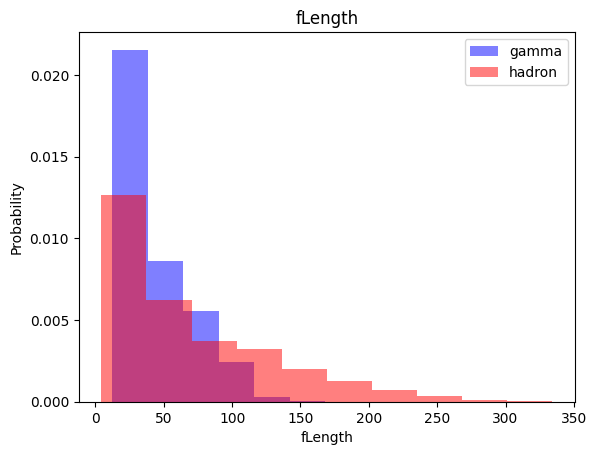

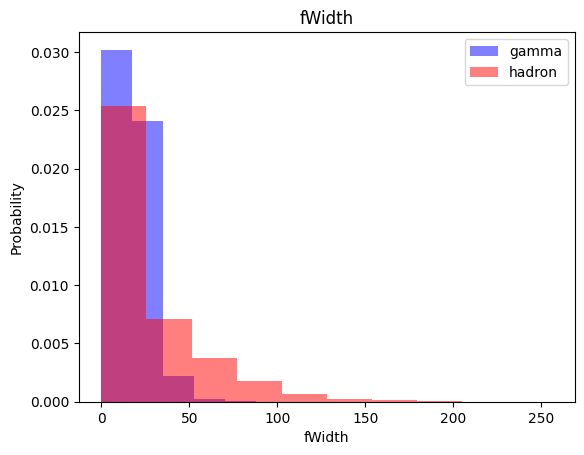

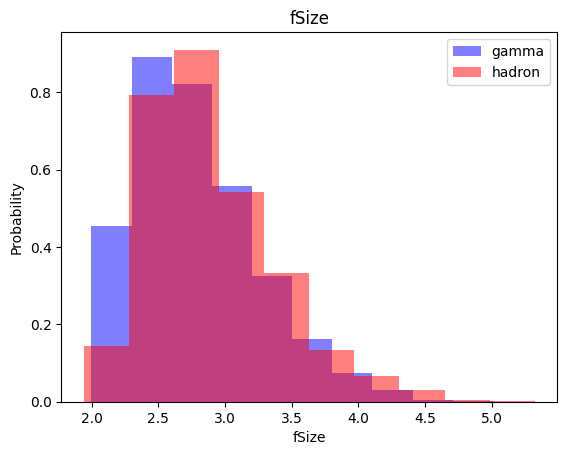

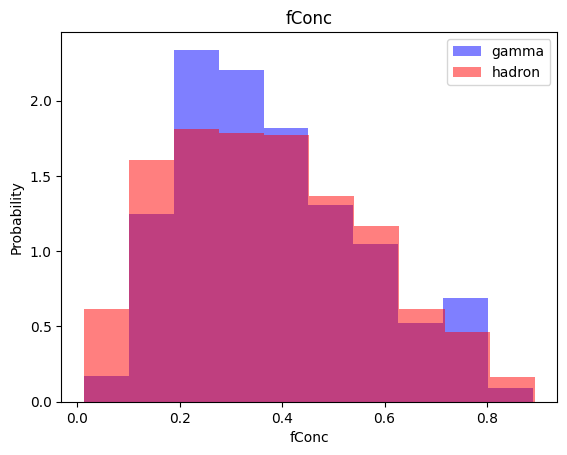

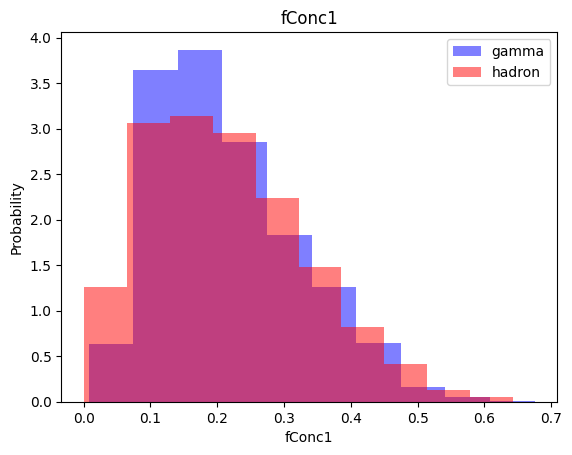

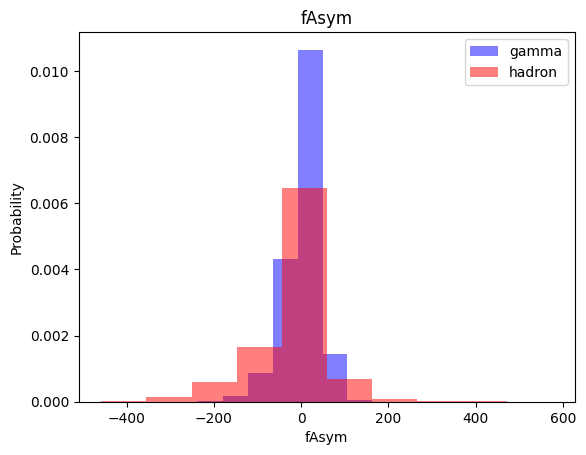

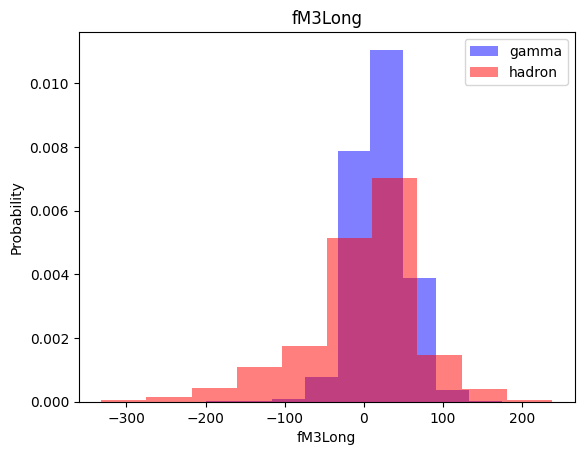

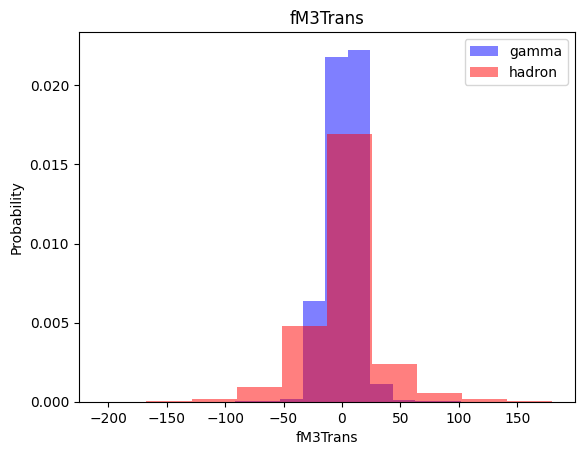

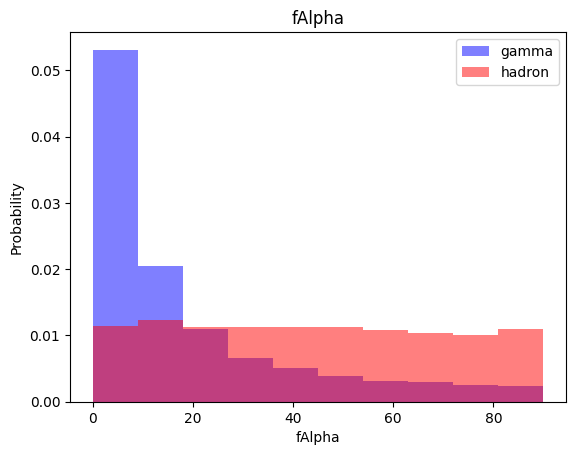

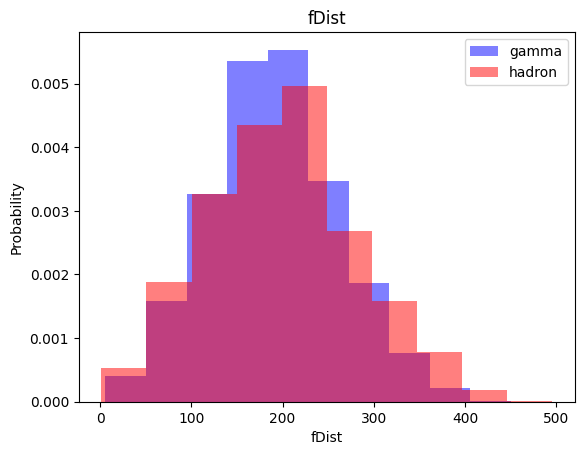

In [10]:
# Now we'll loop all the table and plot the last column (class) against each of the other columns
for label in cols[:-1]:
    plt.hist(data_frame[data_frame['class'] == 1][label],
             color='b', alpha=0.5, label='gamma', density=True)
    plt.hist(data_frame[data_frame['class'] == 0][label],
             color='r', alpha=0.5, label='hadron', density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend(loc='upper right')
    plt.show()

# Using this graph, we can see that the fConc, fConc1, fAlpha, and fDist columns have a good separation between the two classes.

## Train, validation and test sets


In [11]:
# Split the data into 60% training, 20% validation, and 20% testing
train_dt, validate_dt, test_dt = np.split(data_frame.sample(
    frac=1), [int(.6*len(data_frame)), int(.8*len(data_frame))])

c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
def scale_dt(dataframe, oversample=False):
    # Get the values of all columns except the last one (class)
    X = dataframe[dataframe.columns[:-1]].values
    # Get the values of the last column (class)
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()

    # Scale the data
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Create a 2d numpy array of the scaled data
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [13]:
# If we check the training length of classes, we can see that the data is imbalanced
# print('Training length of class 0: ', len(
#    train_dt[train_dt['class'] == 0]))
# print('Training length of class 1: ', len(
#    train_dt[train_dt['class'] == 1]))

# We will use the RandomOverSampler to balance the data
train_dt, X_train, y_train = scale_dt(train_dt, oversample=True)
validate_dt, X_validate, y_validate = scale_dt(validate_dt)
test_dt, X_test, y_test = scale_dt(test_dt)

In [14]:
# Now if we check the training length of classes, we can see that the data is balanced, basically their lengths are the same
# print('Balanced training dataset total length: ', len(train_dt))
# print('Balanced training length of class 0: ', sum(y_train == 0))
# print('Balanced training length of class 1: ', sum(y_train == 1))

## Knn (K-nearest neighbors) classifier


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
# Using the KNeighborsClassifier, we will train the model with the training data
# KNeighborsClassifier is a classifier that uses the k nearest neighbors of a data point to predict its class
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)  # Train the model

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Predict the classes of the test data
y_prediction = knn_model.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1336
           1       0.85      0.84      0.84      2468

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



## Naive Bayes classifier


In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
# Naive Bayes is a classifier that uses the Bayes theorem to predict the class of a data point
# The bayes theorem is P(A|B) = P(B|A) * P(A) / P(B) wich means that the probability of A given B is equal to the probability
# of B given A times the probability of A divided by the probability of B
# The naive part of the name comes from the fact that it assumes that the features are independent of each other
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Train the model

GaussianNB()

In [20]:
y_prediction = nb_model.predict(X_test)  # Predict the classes of the test data
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1336
           1       0.74      0.90      0.81      2468

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic regression classifier (LogReg)


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Logistic regression is a classifier that uses the logistic function to predict the class of a data point
# The logistic function is f(x) = 1 / (1 + e^-x)
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)  # Train the model

LogisticRegression()

In [23]:
y_prediction = lg_model.predict(X_test)  # Predict the classes of the test data
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1336
           1       0.84      0.81      0.83      2468

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## SVM (Support Vector Machine) classifier


In [24]:
from sklearn.svm import SVC

In [25]:
# Support Vector Machine is a classifier that uses hyperplanes to separate the data points into classes
# The hyperplane is the line that separates the data points into classes
svm_model = SVC()
svm_model.fit(X_train, y_train)  # Train the model

SVC()

In [26]:
# Predict the classes of the test data
y_prediction = svm_model.predict(X_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1336
           1       0.89      0.90      0.89      2468

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Network classifier


In [27]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: []
Num GPUs: 0


In [28]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [29]:
def train_model(X_train, y_train, n_nodes, dropout_prob, learning_rate, size, epochs):
    nn_model = tf.keras.models.Sequential([
        # First hidden layer, 32 neurons, relu activation function and 10 input neurons
        tf.keras.layers.Dense(n_nodes, activation='relu', input_shape=(10,)),
        # Dropout layer
        tf.keras.layers.Dropout(dropout_prob),
        # Second hidden layer, 32 neurons, relu activation function
        tf.keras.layers.Dense(n_nodes, activation='relu'),
        # Dropout layer
        tf.keras.layers.Dropout(dropout_prob),
        # Output layer, 1 neuron, sigmoid activation function
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model, using accuracy metrics so we can see the accuracy of the model
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Train the model
    history = nn_model.fit(X_train, y_train, epochs=epochs,
                           batch_size=size, validation_split=0.2, verbose=0)

    return nn_model, history

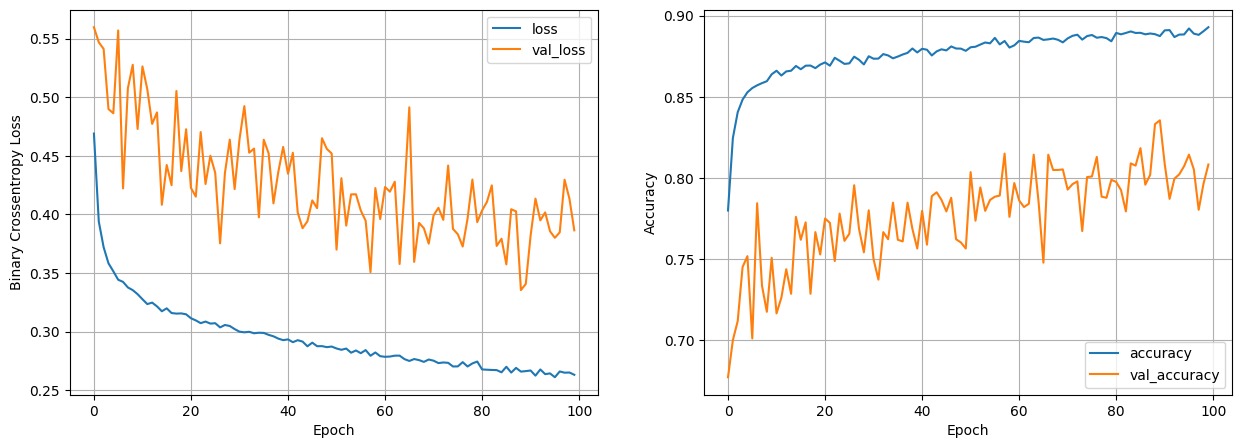

119/119 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8812


In [30]:
epochs = 100

# This model configuration was found using a set of hyperparameters
nn_model, history = train_model(
    X_train, y_train, 64, 0.1, 0.001, 64, epochs)
plot_history(history)

val_loss, val_acc = nn_model.evaluate(X_validate, y_validate)

In [31]:
nn_model.predict(X_test)

y_prediction = np.round(nn_model.predict(X_test)).astype(int).reshape(-1)

# As you can see, the accuracy of this nn model is better/similar than svm
print(classification_report(y_test, y_prediction))

119/119 [==============================] - 0s 682us/step
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1336
           1       0.88      0.94      0.91      2468

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

